# <p style="background-color:#124559; font-family:Georgia ; color:#eff6e0; font-size:150%; text-align:center;  border-radius:10% / 50%;">Flight Data</p>

<img src="airport-image.jpg" alt="flight" style="width:50%; border-radius: 50px;  display: block; margin-left: auto; margin-right: auto;" >

<div dir='rtl'>
    <h1 style= "margin-right: 20px ; color:#ffa62b">تحلیل مجموعه داده پرواز</h1>
    <p style= "font-size:110%; margin-right: 20px">در این پروژه، به تحلیل مجموعه داده‌ پرواز موجود در <b>flights.csv</b> با استفاده از کتابخانه‌های scipy، pandas، numpy و آمار تفسیری می‌پردازیم. هدف این است که با انجام عملیات خلاصه سازی و گزارش نویسی بر روی ستون های مختلف این مجموعه داده، به بینش های جالبی در مورد اتفاقات و روندهای موجود در داده‌ها دست پیدا کنیم.</p>
    
</div>

# <h1 dir='rtl' style= "margin-right: 20px ; color:#ffa62b">1) فراخوانی کتابخانه‌های مورد نیاز</h1>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# <h1 dir='rtl' style= "margin-right: 20px ; color:#ffa62b">2) خواندن مجموعه داده</h1>
<p dir='rtl' style= "font-size:110%; margin-right: 20px">ابتدا مجموعه داده را با استفاده از کتابخانه pandas می‌خوانیم:</p>

In [2]:
data = pd.read_csv('flights.csv')
data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [3]:
rows,cols = data.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  336776
Number of columns:  21


# <h1 dir='rtl' style= "margin-right: 20px ; color:#ffa62b">3) مشخصات مجموعه داده پرواز</h1>
<!DOCTYPE html>
<html>
<head>
<style>
/* table, th, td {
  border: 1px solid;
  background-color:#124559;
  margin-right: 20px;
} */
  table {
      width: 90%;
      border-collapse: collapse;
      /* border: 1px solid; */
      background-color:#124559;
      margin-left: 50px;
  }
  th, td {
      border: 1px solid;
      background-color:#124559;
      /* margin-right: 20px; */
      border: 1px solid #ddd;
      padding: 8px;
      text-align: center;
      word-wrap: break-word;
      color:#eff6e0;
      font-size:110%
  }
</style>
</head>
<body>

<table dir='rtl'>
  <tr>
    <th>ردیف</th>
    <th>متغیرها</th>
    <th>توضیحات</th>
  </tr>
  <tr>
    <td>1</td>
    <td>id</td>
    <td>یک شماره منحصر به فرد برای هر ردیف در مجموعه داده.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>year</td>
    <td>سالی که پرواز در آن انجام شده است (سال 2013).</td>
  </tr>
  <tr>
    <td>3</td>
    <td>month</td>
    <td>ماه سالی که پرواز در آن انجام شده است (1 تا 12).</td>
  </tr>
  <tr>
    <td>4</td>
    <td>day</td>
    <td>روزی از ماه که پرواز در آن انجام شده است (1تا 31).</td>
  </tr>
  <tr>
    <td>5</td>
    <td>dep_time</td>
    <td>زمان حرکت واقعی پرواز، به‌صورت 24 ساعته.</td>
  </tr>
  <tr>
    <td>6</td>
    <td>sched_dep_time</td>
    <td>زمان حرکت برنامه ریزی شده پرواز به‌صورت 24 ساعته</td>
  </tr>
  <tr>
    <td>7</td>
    <td>dep_delay</td>
    <td style="max-width: 5px;">تاخیر در خروج پرواز، تفاوت بین زمان حرکت واقعی و برنامه ریزی شده(بر حسب دقیقه). مقادیر مثبت نشان دهنده تاخیر و مقادیر منفی نشان دهنده خروج زودهنگام است.</td>
  </tr>
  <tr>
    <td>8</td>
    <td>arr_time</td>
    <td>زمان واقعی رسیدن هواپیما به صورت 24 ساعته</td>
  </tr>
  <tr>
    <td>9</td>
    <td>sched_arr_time</td>
    <td>زمان ورود برنامه ریزی شده پرواز به صورت 24 ساعته</td>
  </tr>
  <tr>
    <td>10</td>
    <td>arr_delay</td>
    <td style="max-width: 5px;">تأخیر در رسیدن پرواز، تفاوت بین زمان‌ ورود واقعی و برنامه‌ریزی‌شده (بر حسب دقیقه). مقادیر مثبت نشان دهنده تاخیر و مقادیر منفی نشان دهنده ورود زودهنگام است.</td>
  </tr>
  <tr>
    <td>11</td>
    <td>carrier</td>
    <td>شرکت هواپیمایی.</td>
  </tr>
  <tr>
    <td>12</td>
    <td>flight</td>
    <td>شماره پرواز</td>
  </tr>
  <tr>
    <td>13</td>
    <td>tailnum</td>
    <td>کد هواپیما</td>
  </tr>
  <tr>
    <td>14</td>
    <td>origin</td>
    <td> مبدا پرواز </td>
  </tr>
  <tr>
    <td>15</td>
    <td>dest</td>
    <td>مقصد پرواز</td>
  </tr>
  <tr>
    <td>16</td>
    <td>air_time</td>
    <td>مدت زمانی که هواپیما در هوا می گذراند.</td>
  </tr>
  <tr>
    <td>17</td>
    <td>distance</td>
    <td>فاصله بین فرودگاه مبدا و مقصد (بر حسب مایل). </td>
  </tr>
  <tr>
    <td>18</td>
    <td>hour</td>
    <td>ساعت زمان حرکت برنامه ریزی شده</td>
  </tr>
  <tr>
    <td>19</td>
    <td>minute</td>
    <td> دقیقه زمان حرکت برنامه ریزی شده</td>
  </tr>
  <tr>
    <td>20</td>
    <td>time_hour</td>
    <td> .زمان کامل پرواز (شامل سال، ماه، روز، ساعت و دقیقه).</td>
  </tr>
  <tr>
    <td>21</td>
    <td>name</td>
    <td>نام کامل شرکت هواپیمایی مسئول پرواز.</td>
  </tr>
</table>

</body>
</html>


# <h1 dir='rtl' style= "margin-right: 20px ; color:#ffa62b">4) اطلاعات پایه مجموعه داده </h1>
<p dir='rtl' style= "font-size:110%; margin-right: 20px">با توجه به اینکه شناسه پرواز (id) یک شماره منحصر به فرد برای هر رکورد پرواز است، می توان از آن به عنوان جایگزینی برای ردیف استفاده کرد.</p>


In [4]:
# Replace the 'id' column with the index
data = data.set_index('id')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute         

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">
<style>
    b {
        color:#598392;
    }
</style>

* این مجموعه داده شامل اطلاعات مربوط به 336776 پرواز است. 21 ستون مختلف اطلاعات مربوط به هر پرواز را نشان می دهد.
    
* مجموعه داده شامل مقادیری از دست رفته در ستون‌های <b>dep_time</b>، <b>dep_delay</b>، <b>arr_time</b>، <b>arr_delay</b>، <b>tailnum</b> و <b>air_time</b>می‌باشد.
</div>

# <h3 dir='rtl' style= "margin-right: 20px ; color:#ffa62b"> خلاصه آمار برای متغیرهای عددی:</h3>

In [6]:
# Get the summary statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
flight,336776.0,1971.923620,1632.471938,1.0,553.0,1496.0,3465.0,8500.0


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">
<style>
    b {
        color:#598392;
    }
</style>

* <b>year</b>: همه رکوردها مربوط به سال 2013 هستند، بنابراین هیچ گونه تغییری وجود ندارد.
* <b>month</b>, <b>day</b>, <b>hour</b>,<b>minute</b>: این ویژگی ها تاریخ و زمان حرکت برنامه ریزی شده را نشان می دهند. به نظر می رسد توزیع آنها در طول سال و روز به طور یکنواخت باشند.
* <b>dep_time</b>, <b>sched_dep_time</b>, <b>arr_time</b>, <b>sched_arr_time</b>: این ویژگی‌ها زمان حرکت و رسیدن واقعی پروازها و  برنامه‌ریزی شده است. ویژگی‌ها در قالب 24 ساعته هستند و تمام مقادیر ممکن را پوشش می دهند.
* <b>dep_delay</b>, <b>arr_delay</b>:تاخیر خروج و رسیدن را در چند دقیقه نشان می دهند. مقادیر از منفی (خروج یا ورود زودهنگام) تا مثبت (خروج یا ورود دیرهنگام) متغیر است.
* <b>air_time</b>:  مدت پرواز بر حسب دقیقه است. از 20 تا 695 دقیقه متغیر است.
* <b>distance</b>: کل فاصله بین فرودگاه مبدا و مقصد است. از 17 تا 4983 مایل متغیر است.

</div>



# <h3 dir='rtl' style= "margin-right: 20px ; color:#ffa62b"> خلاصه آمار برای متغیرهای طبقه بندی شده:</h3>

In [7]:
# Get the summary statistics for categorical variables
data.describe(include='object').T

,count,unique,top,freq
carrier,336776,16,UA,58665
tailnum,334264,4043,N725MQ,575
origin,336776,3,EWR,120835
dest,336776,105,ORD,17283
time_hour,336776,6936,2013-09-13 08:00:00,94
name,336776,16,United Air Lines Inc.,58665


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">
<style>
    b {
        color:#598392;
    }
</style>

* <b>carrier</b>, <b>name</b>: کدها و نام‌های شرکت هواپیمایی هستند. 16 شرکت هواپیمایی منحصر به فرد در مجموعه داده وجود دارد.
* <b>tailnum</b>: شناسه منحصر به فرد مرتبط با هواپیمای مورد استفاده برای پرواز است. تعداد زیادی مقادیر منحصر به فرد دارد که نشان دهنده تنوع هواپیماها است.
* <b>origin</b>، <b>dest</b>: کدهای فرودگاه مبدا و مقصد پرواز هستند. 3 فرودگاه مبدا و 105 فرودگاه مقصد منحصر به فرد در مجموعه داده وجود دارد.
* <b>time_hour</b>: زمان حرکت برنامه ریزی شده پرواز به وقت محلی است. 6936 زمان منحصر به فرد در مجموعه داده وجود دارد.
</div>



# <p style="background-color:#124559; font-family:Georgia ; color:#eff6e0; font-size:150%; text-align:center;  border-radius:10% / 50%;"> پاکسازی داده‌ها</p>

# <h3 dir='rtl' style= "margin-right: 20px ; color:#ffa62b">راه حل برای مقادیر بدون اطلاعات:</h3>

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">
<style>
    b {
        color:#598392;
    }
</style>
مقادیر خالی در داده‌ها چالشی رایج در تحلیل داده هستند. راه حل‌های مختلفی برای مدیریت این مقادیر وجود دارد که انتخاب هر یک به نوع داده، نحوه جمع‌آوری آن و هدف تحلیل بستگی دارد. برخی از روش‌های رایج برای برخورد با مقادیر خالی عبارتند از:

* <b>حذف رکوردهای دارای مقادیر خالی</b>: این روش ساده‌ترین راه حل است، اما می‌تواند منجر به از دست رفتن اطلاعات مفید شود.

* <b>جایگزینی مقادیر خالی با مقادیر دیگر</b>: می‌توان مقادیر خالی را با میانگین، میانه، یا مد مقادیر موجود در همان ستون جایگزین کرد.
 
* <b>استفاده از الگوریتم‌های پیش‌بینی</b>: می‌توان از الگوریتم‌های یادگیری ماشین برای پیش‌بینی مقادیر خالی بر اساس سایر ویژگی‌های موجود در داده‌ها استفاده کرد.

انتخاب بهترین روش برای مدیریت مقادیر خالی به عوامل مختلفی بستگی دارد. با توجه به تعداد کمی از مقادیر گم شده (که احتمالاً مربوط به اطلاعات پروازهای لغو شده است) در مقایسه با تعداد کل نقاط داده، می توانیم آنها را حذف کنیم:
</div>


In [8]:
# Check the percentage of missing values in each column
missing_percent = data.isnull().mean().sort_values(ascending=False) * 100
print("Missing Value Percentage by Columns:\n", round(missing_percent,2))

Missing Value Percentage by Columns:
 arr_delay         2.80
air_time          2.80
arr_time          2.59
dep_time          2.45
dep_delay         2.45
tailnum           0.75
year              0.00
dest              0.00
time_hour         0.00
minute            0.00
hour              0.00
distance          0.00
flight            0.00
origin            0.00
month             0.00
carrier           0.00
sched_arr_time    0.00
sched_dep_time    0.00
day               0.00
name              0.00
dtype: float64


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">
<style>
    b {
        color:#598392;
    }
</style>
با توجه به اینکه درصد کمی از داده ها در ستون هدف خالی هستند، می توان آنها را بدون نگرانی از دست رفتن اطلاعات مهم حذف کرد. 

</div>


In [9]:
data.dropna(inplace = True)           # Removing Missing Values
data.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64

# <p style="background-color:#124559; font-family:Georgia ; color:#eff6e0; font-size:150%; text-align:center;  border-radius:10% / 50%;"> (EDA) تحلیل اکتشافی داده‌ها</p>

In [10]:
# Set color for the plots
color = '#124559'

# Define function to plot histograms
def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        if count > 0:
            plt.text(x, count, str(int(count)), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()
    
# Define function to plot bar plots
def plot_bar(column, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts = column.value_counts()
    counts.plot(kind='bar', color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add text annotation for frequencies with rotation and larger font size
    for i, v in enumerate(counts):
        plt.text(i, v, str(v), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

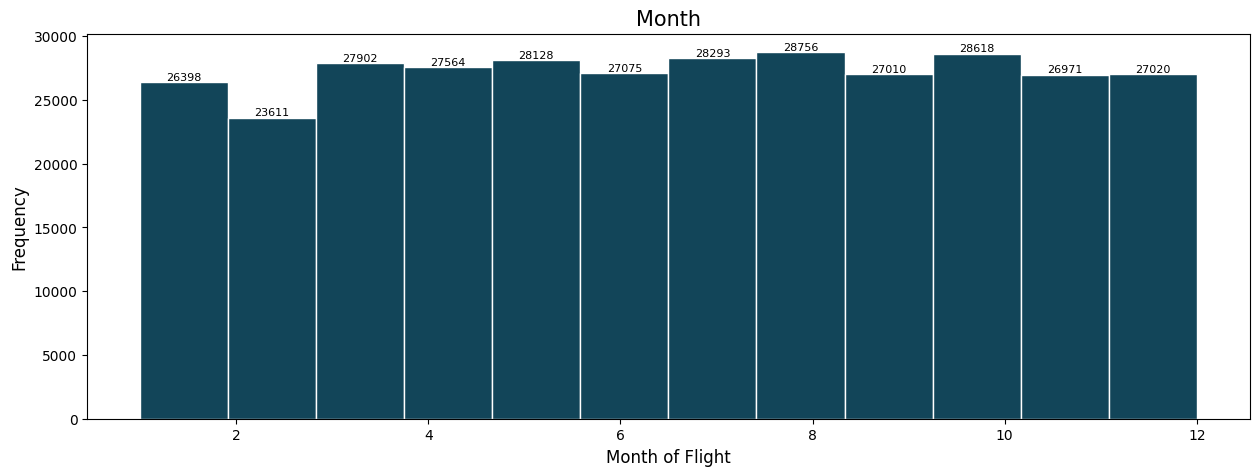

In [11]:
plot_hist(data['month'], bins=12, title='Month', xlabel='Month of Flight')

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* هیستوگرام نشان می‌دهد که توزیع پروازها در ماه‌های مختلف تقریباً یکنواخت است تعداد پروازها در ماه دوم کمترین مقدار و در ماه‌های 7 و 8 بیشترین مقدار را داشته است.

</div>

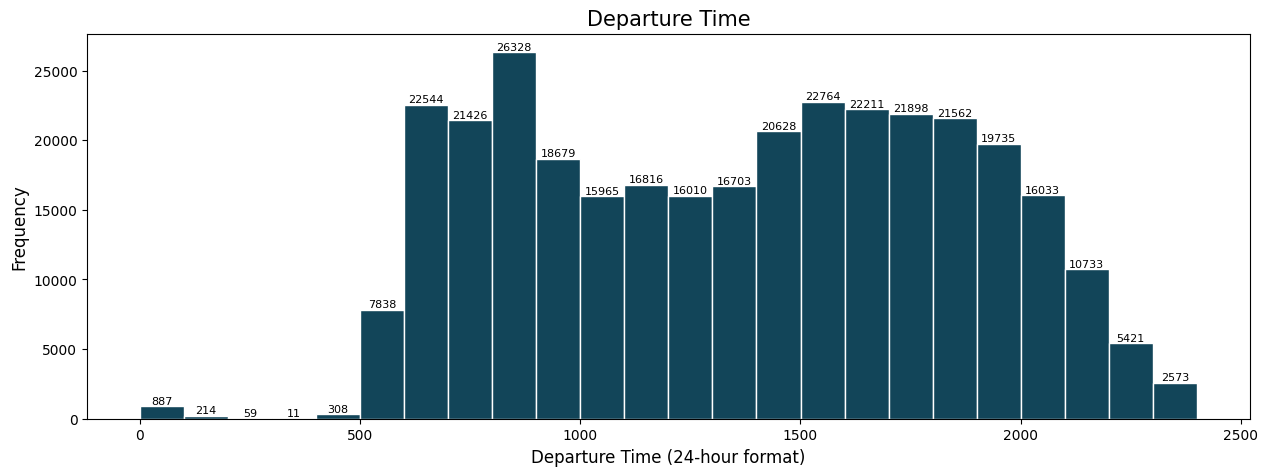

In [12]:
plot_hist(data['dep_time'].dropna(), bins=24, title='Departure Time', xlabel='Departure Time (24-hour format)')

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* هیستوگرام نمایش داده  شده دو دوره اوج را برای خروج پرواز نشان می دهد. اوج اول صبح حدود ساعت 06:00 و اوج دوم در عصر حوالی ساعت 18:00 رخ می دهد.همینطور پروازهای کمتری در شب از ساعت 23:00 تا 04:00 انجام می شود.

</div>

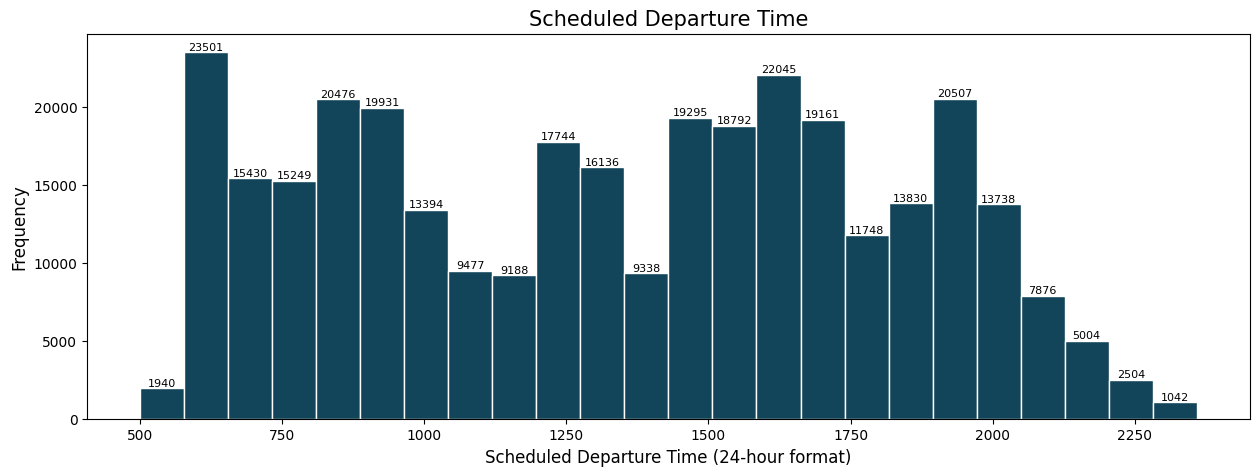

In [13]:
# The locally scheduled departure time of the flight, presented in a 24-hour format (hhmm).
plot_hist(data['sched_dep_time'], bins=24, title='Scheduled Departure Time', xlabel='Scheduled Departure Time (24-hour format)')

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  هیستوگرام نمایش داده شده مشابه هیستوگرام زمان خروج پرواز است. همچنین دو دوره اوج پرواز برنامه ریزی شده را نشان می دهد که همان زمان های حرکت واقعی است.

</div>

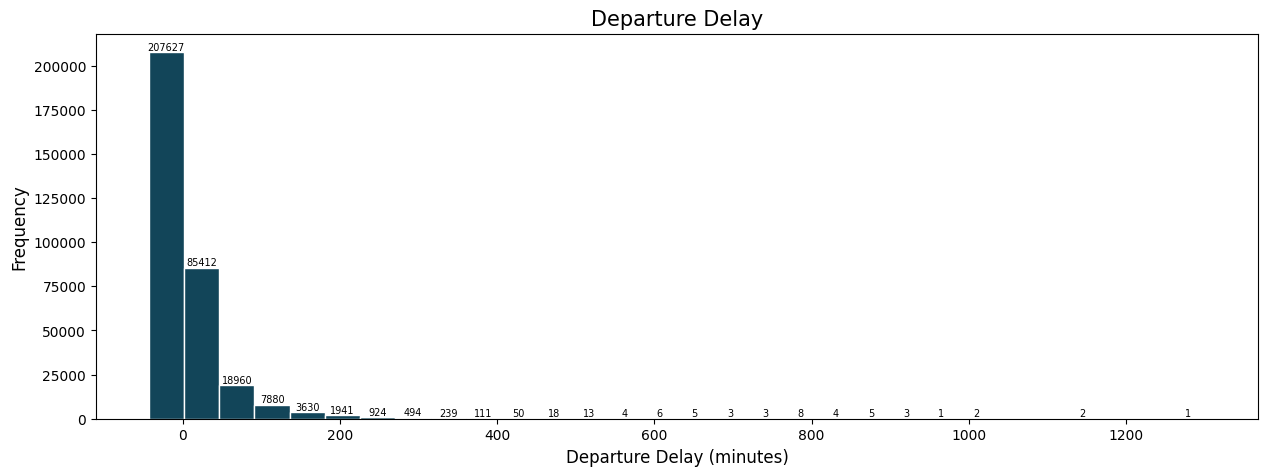

In [14]:
# The delay in flight departure, calculated as the difference (in minutes) between the actual and scheduled departure times. 
# Positive values indicate a delay, while negative values indicate an early departure.
plot_hist(data['dep_delay'].dropna(), bins=30, title='Departure Delay', xlabel='Departure Delay (minutes)', fontsize=7)

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  هیستوگرام نشان می دهد که اکثر پروازها نزدیک به زمان حرکت برنامه ریزی شده خود حرکت می کنند، زیرا اوج توزیع نزدیک به صفر است. دم بلند سمت راست توزیع، نشان‌دهنده وجود تعداد قابل توجهی پرواز با تاخیر است.

</div>

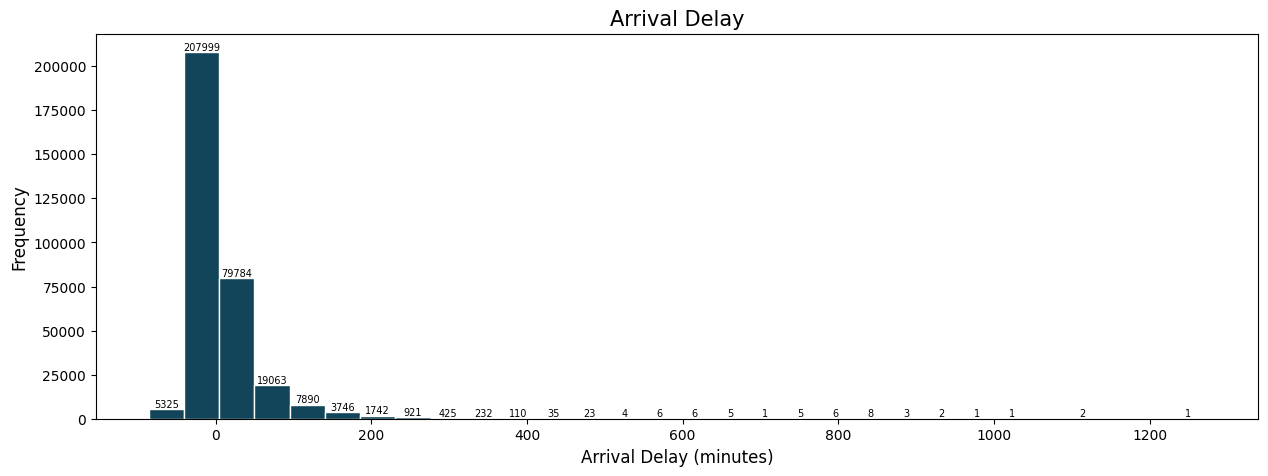

In [15]:
# The delay in flight arrival, calculated as the difference (in minutes) between the actual and scheduled arrival times. 
# Positive values indicate a delay, while negative values indicate an early arrival.
plot_hist(data['arr_delay'].dropna(), bins=30, title='Arrival Delay', xlabel='Arrival Delay (minutes)', fontsize=7)

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*   هیستوگرام نشان می دهد که اکثر پروازها نزدیک به زمان رسیدن برنامه ریزی شده خود می رسند، زیرا اوج توزیع نزدیک صفر است. مشابه هیستوگرام خروج پرواز است.

</div>

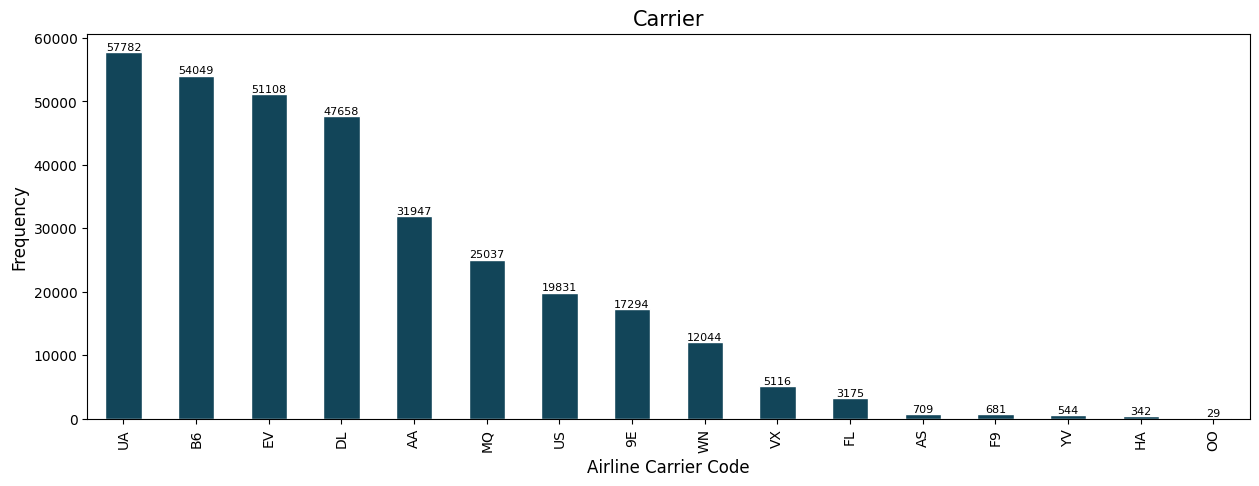

In [16]:
# A two-letter code representing the airline carrier responsible for the flight.
plot_bar(data['carrier'], 'Carrier', 'Airline Carrier Code')

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*   نمودار نشان می دهد که شرکت های هواپیمایی با کدهای EV، B6، UA و DL بیشترین پروازها را در این مجموعه داده انجام می دهند.
</div>

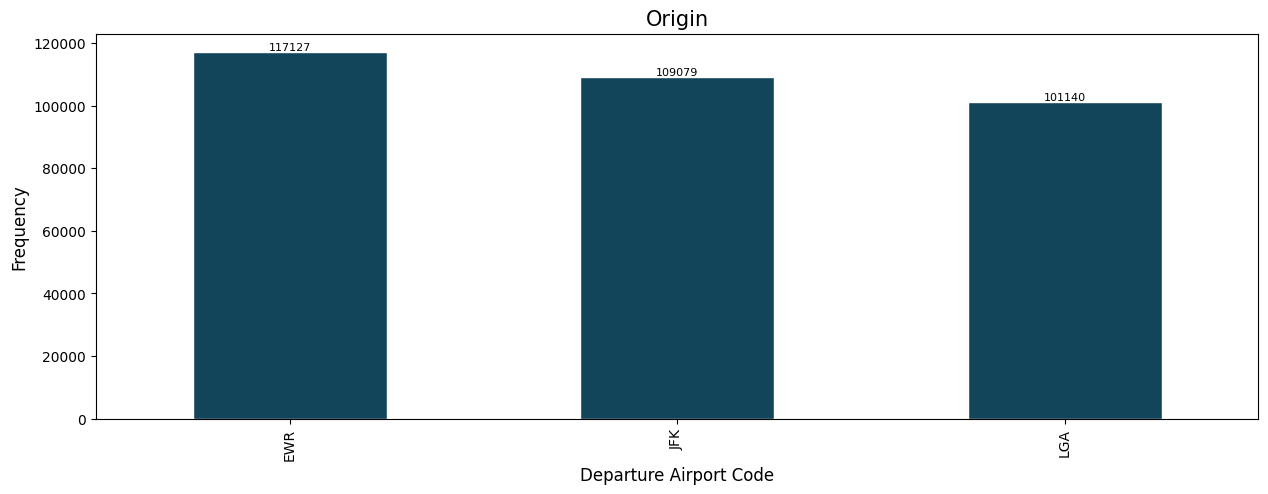

In [17]:
# A three-letter code signifying the airport from which the flight departed.
plot_bar(data['origin'], 'Origin', 'Departure Airport Code')

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*   نمودار نشان می دهد که اکثر پروازهای این مجموعه داده با کد EWR از فرودگاه خارج می شوند.
</div>

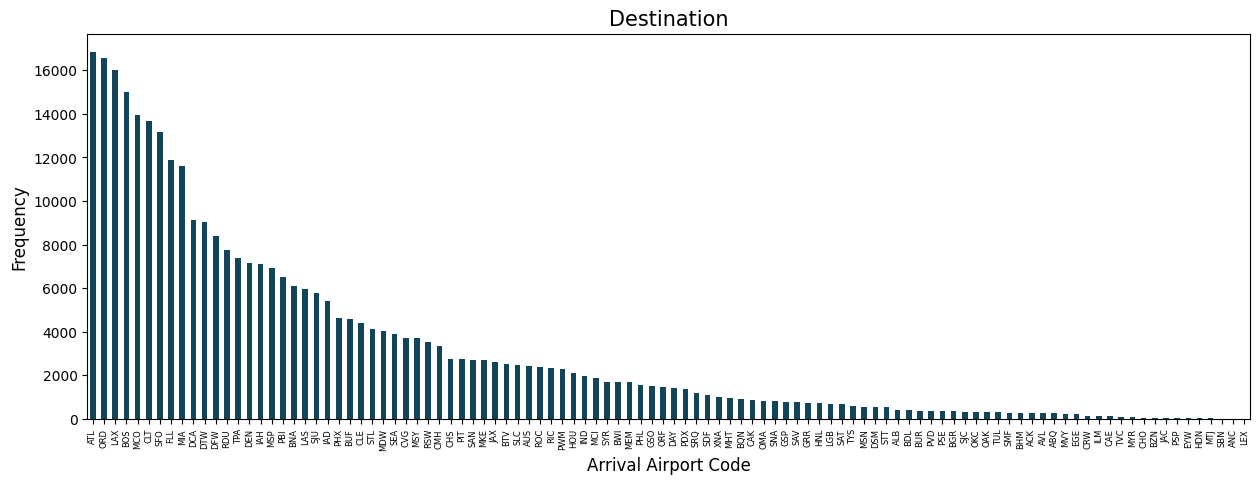

In [18]:
# A three-letter code representing the airport at which the flight arrived.
plt.figure(figsize=(15,5))
data['dest'].value_counts().plot(kind='bar', color=color)
plt.title('Destination', fontsize=15)
plt.xlabel('Arrival Airport Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=6)
plt.show()

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*   نمودار نشان می دهد که رایج ترین فرودگاه‌های مقصد ATL ،ORD و LAX هستند.
</div>

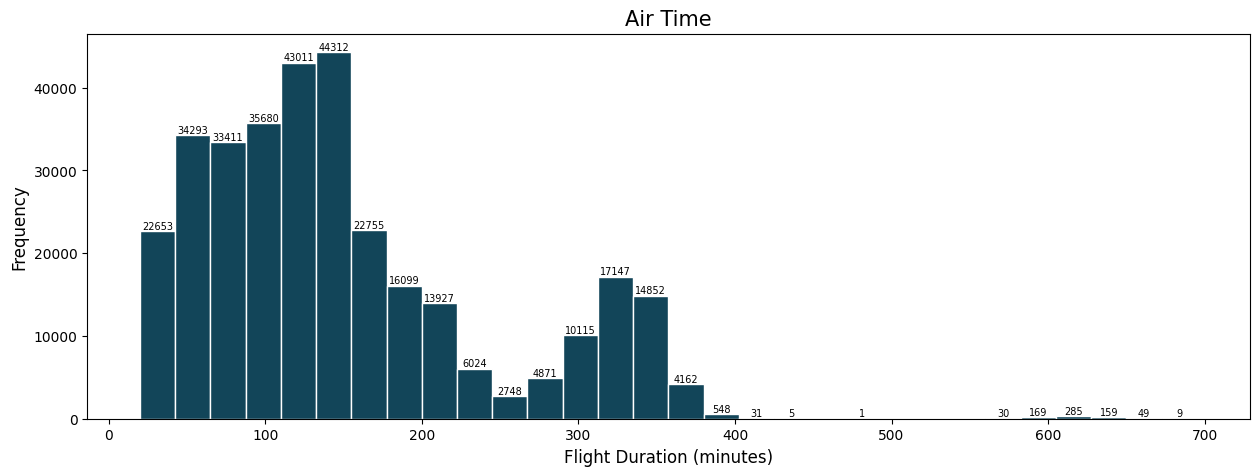

In [19]:
plot_hist(data['air_time'].dropna(), bins=30, title='Air Time', xlabel='Flight Duration (minutes)', fontsize=7)

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*   هیستوگرام نشان می دهد که بیشتر پروازها دارای زمان پخش حدود 50 تا 200 دقیقه هستند و تعداد کمی از پروازها زمان پخش طولانی‌تری دارند. همینطور داده های دورافتاده مجموعه داده هستند که به طور قابل توجهی از سایر نقاط فاصله دارند. به عبارت دیگر، این داده ها با الگوی کلی داده‌ها همخوانی ندارند.
</div>



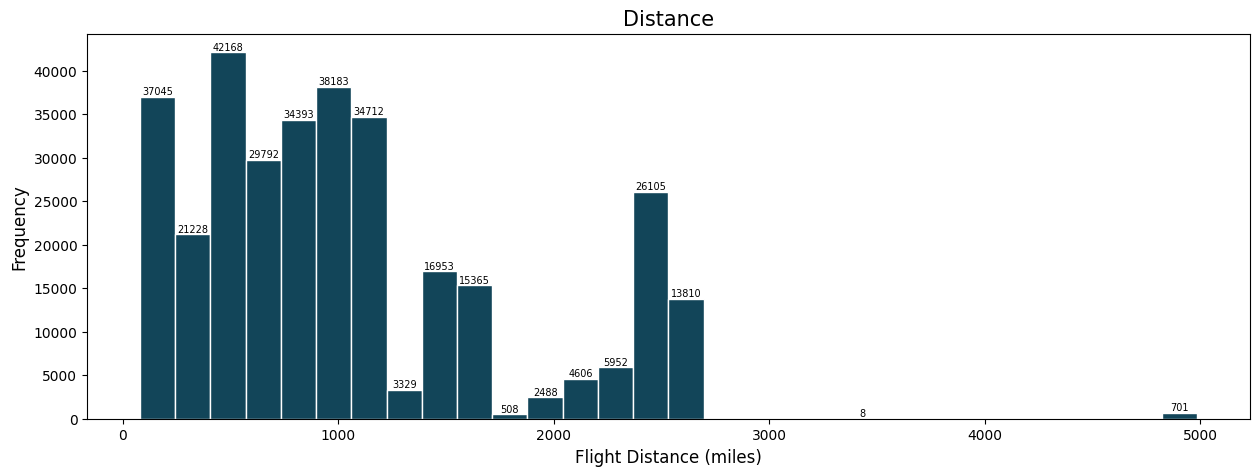

In [20]:
# The total distance (in miles) between the origin and destination airports.
plot_hist(data['distance'], bins=30, title='Distance', xlabel='Flight Distance (miles)', fontsize=7)

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*   هیستوگرام نشان می دهد که بیشتر پروازها مسافتی  حدود 500 تا 1000 مایل را طی می کنند و تعداد کمی از پروازها مسافت طولانی تری را طی می کنند.
</div>

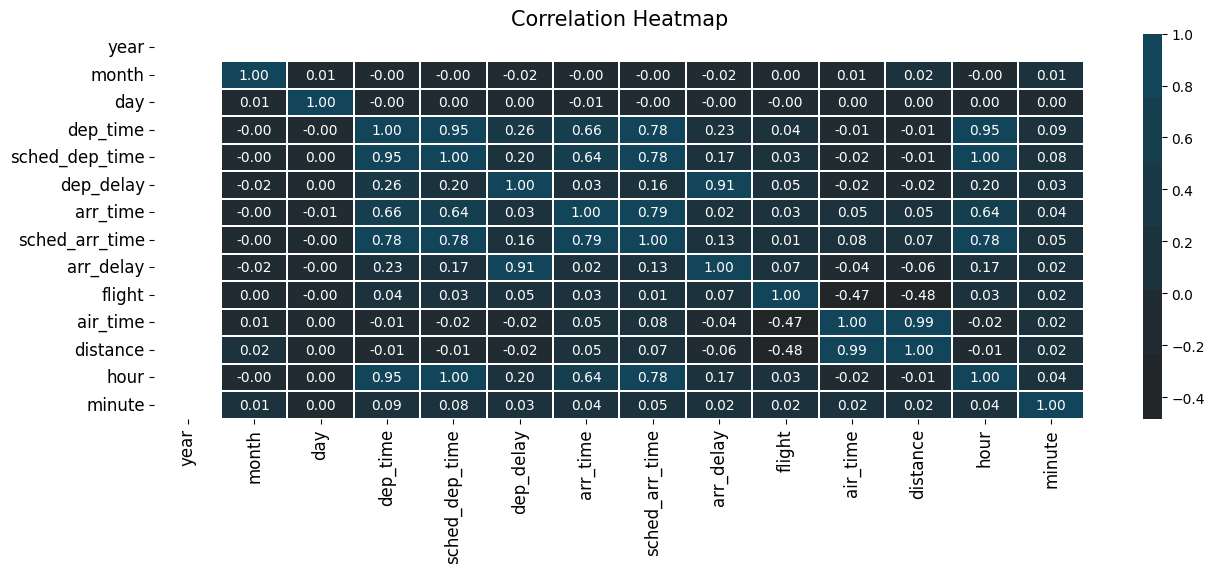

In [21]:
# Define color palette with different shades of color #8502d1 for multivariate plots
colors_multi = sns.dark_palette("#124559", as_cmap=False)

# For correlation heatmap, let's consider the numeric features only
numeric_features = ['month', 'dep_time', 'dep_delay', 'hour']
correlation_matrix = data[numeric_features].corr()
plt.figure(figsize=(15,5))
# plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", linewidth=.3, cmap=colors_multi)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">
<style>
    b {
        color:#598392;
    }
</style>

*   نمودار بالا همبستگی بین ستون‌های <b>arr_delay</b> و <b>dep_delay</b> را با یکدیگر و همچنین همبستگی بین ستون های <b>distance</b> و <b>air_time</b> را نشان می‌دهد. سایر ویژگی‌ها (<b>month</b>، <b>dep_time</b>، و <b>hour</b>) همبستگی بسیار ضعیفی با <b>arr_delay</b> نشان می‌دهند، که نشان می‌دهد این ویژگی‌ها به خودی خود تأثیر شدیدی روی تأخیر ورود ندارند.
</div>

Text(0, 0.5, 'dep_delay')

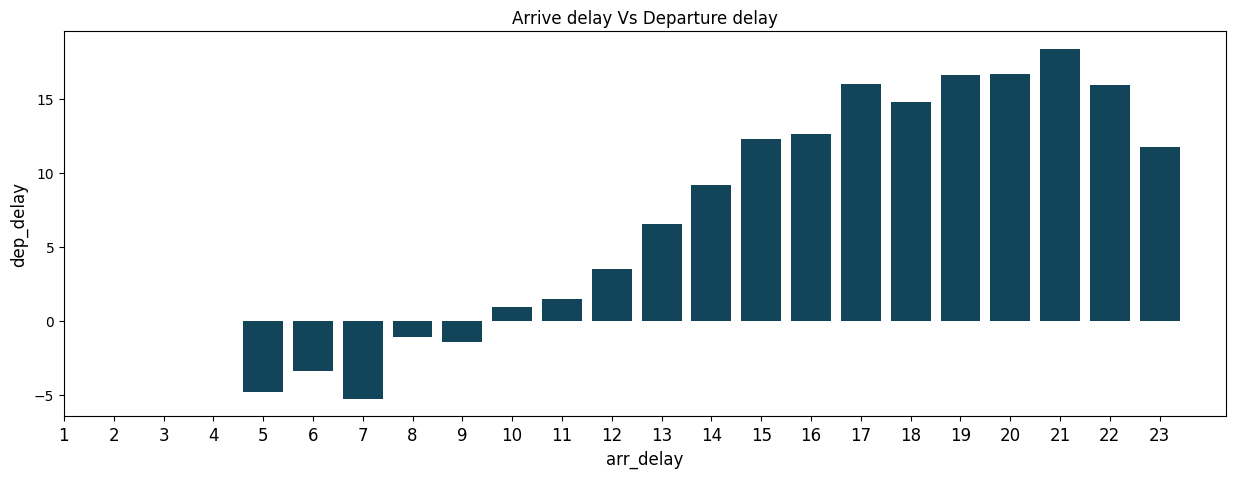

In [22]:
avg_by_hour = data.groupby(['hour'], as_index=False).agg({'arr_delay': 'mean'}).round(2)
plt.figure(figsize=(15,5))
plt.bar(avg_by_hour['hour'] , avg_by_hour['arr_delay'], color=color)
plt.title ('Arrive delay Vs Departure delay')
plt.xticks(np.arange(1,24,1),fontsize=12)
plt.xlabel('arr_delay', fontsize=12)
plt.ylabel('dep_delay', fontsize=12)

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* همانطور که نمودار نشان می‌دهد، با نزدیک شدن به اواخر شب، میزان تاخیر پروازها افزایش می‌یابد. بیشترین میزان تاخیر در ساعت 9 شب مشاهده می‌شود.
</div>

Text(0, 0.5, 'dep_delay')

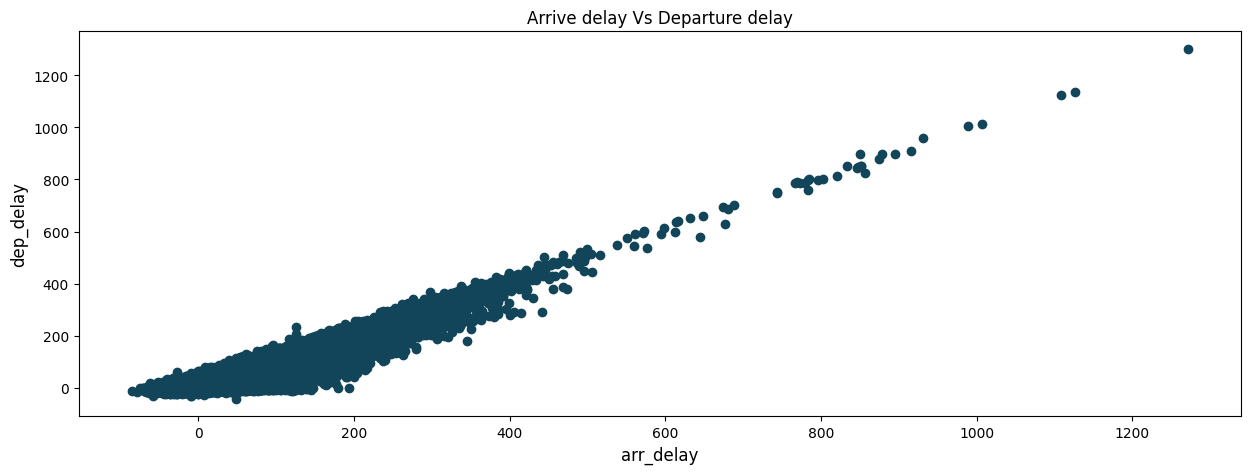

In [23]:
plt.figure(figsize=(15,5))
plt.scatter(data['arr_delay'] , data['dep_delay'], color=color)
plt.title ('Arrive delay Vs Departure delay')
plt.xlabel('arr_delay', fontsize=12)
plt.ylabel('dep_delay', fontsize=12)

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* نمودار نشان دهنده یک رابطه خطی قوی بین تاخیر خروج و تاخیر ورود است. به این معنی که با افزایش تاخیر در خروج، به طور مستقیم تاخیر در ورود نیز افزایش می یابد.

</div>

Text(0, 0.5, 'distance')

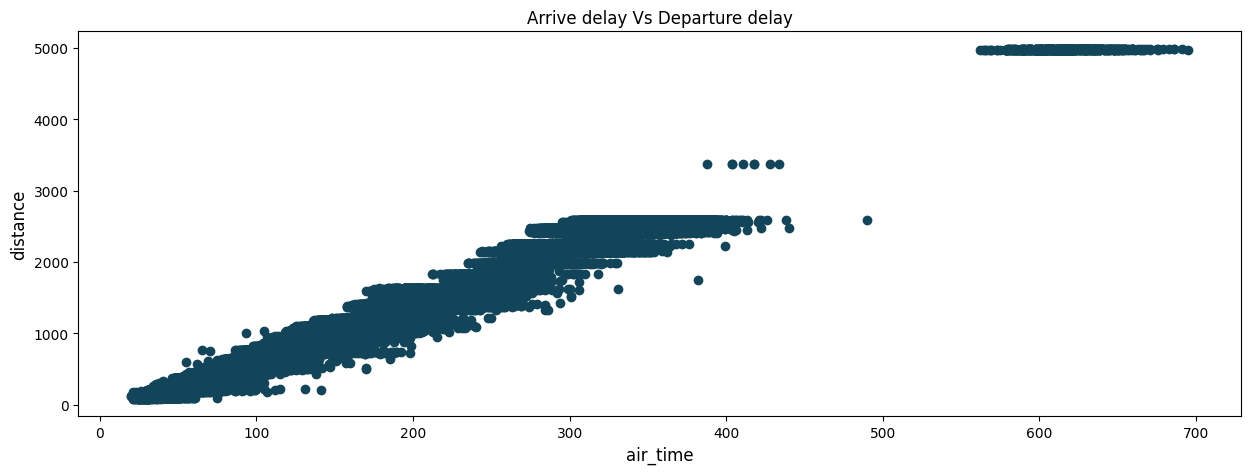

In [16]:
plt.figure(figsize=(15,5))
plt.scatter(data['air_time'] , data['distance'], color=color)
plt.title ('Arrive delay Vs Departure delay')
plt.xlabel('air_time', fontsize=12)
plt.ylabel('distance', fontsize=12)

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* نمودار نشان دهنده رابطه مستقیم بین طول مدت پرواز و فاصله است. به این معنی که با افزایش فاصله، طول مدت پرواز نیز به طور مستقیم افزایش می یابد. بنابراین طبیعتاً مسافت در طول مدت پرواز تأثیر دارد.

</div>

C:\Users\almas\AppData\Local\Temp\ipykernel_7248\3409345357.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Dep_Delay.index, ha='right')
C:\Users\almas\AppData\Local\Temp\ipykernel_7248\3409345357.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(Dep_Delay.index, ha='right')


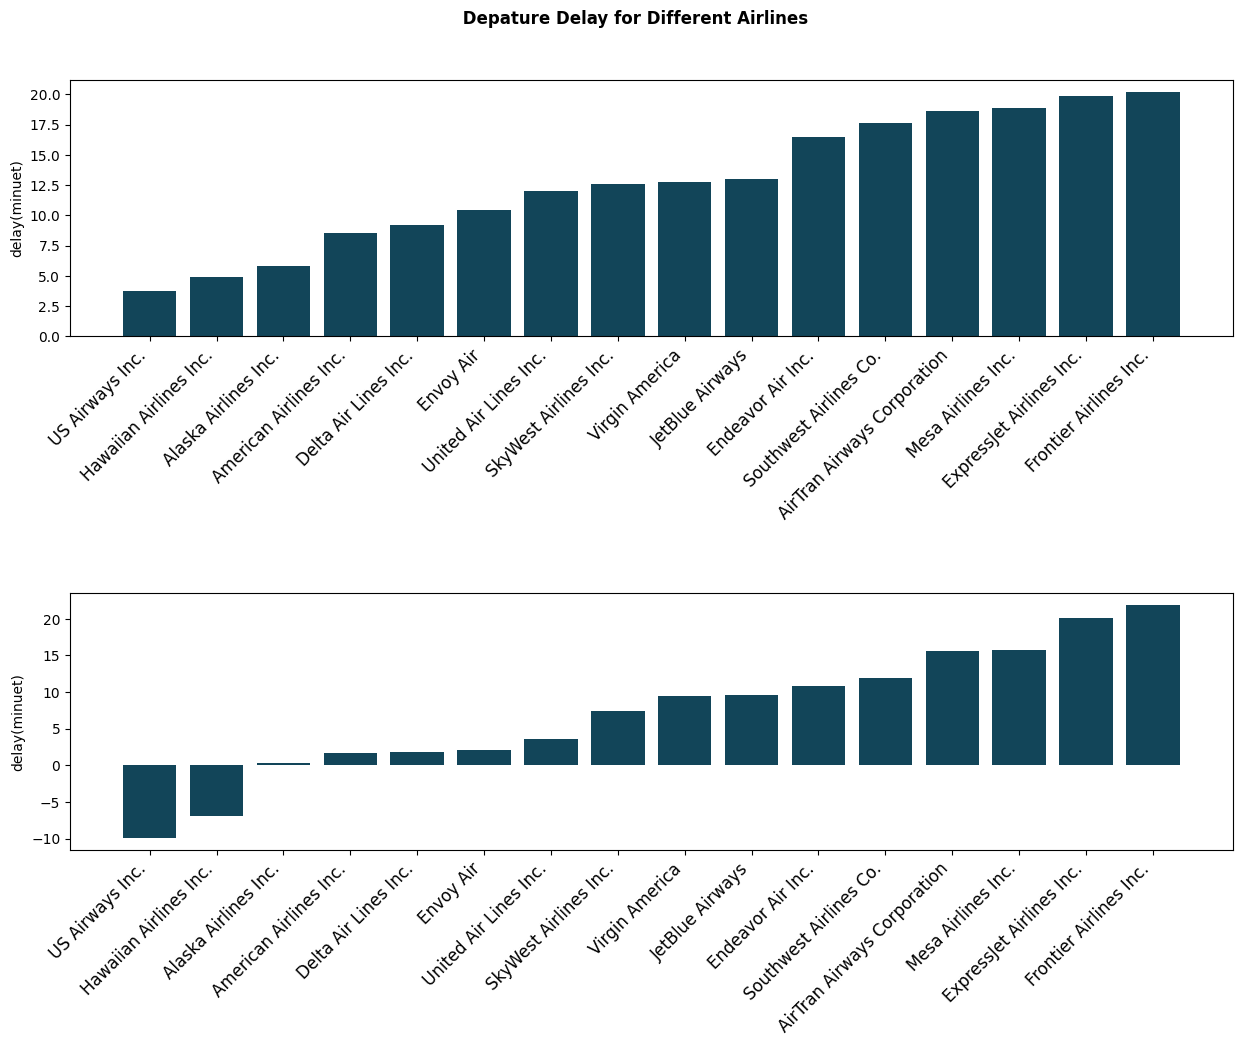

In [24]:
# Bar chart & Pie chart:

Dep_Delay = data.groupby("name")["dep_delay"].mean().sort_values()
Arr_Delay = data.groupby("name")["arr_delay"].mean().sort_values()
# plt.figure(figsize=(10,15))
# fig , ax1 = plt.subplots(nrows=1 , ncols=1, figsize= (15,7))
fig , (ax1,ax2) = plt.subplots(nrows=2 , ncols=1, figsize= (15,10))

ax1.bar(Dep_Delay.index , Dep_Delay.values, color=color)
ax1.set(ylabel = 'delay(minuet)')
ax1.tick_params(axis= 'x' , labelrotation= 45 , labelsize= 12)
ax1.set_xticklabels(Dep_Delay.index, ha='right')

ax2.bar(Arr_Delay.index , Arr_Delay.values, color=color)
ax2.set(ylabel = 'delay(minuet)')
ax2.tick_params(axis= 'x' , labelrotation= 45 , labelsize= 12)
ax2.set_xticklabels(Dep_Delay.index, ha='right')

fig.suptitle(' Depature Delay for Different Airlines' , fontsize = 12 ,y = .95 , fontweight = 'bold')
plt.subplots_adjust(hspace=1)

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">
<style>
    b {
        color:#598392;
    }
</style>
نمودارهای بالا به بررسی تاخیر در زمان حرکت و تاخیر زمان رسیدن پروازهای خطوط هوایی مختلف می‌پردازد. بر اساس نمودارها، می‌توان به نکات زیر پی برد:

* <b>کمترین تاخیر:</b>  شرکت هواپیمایی <b>US Airways Inc</b> کمترین میزان تاخیر در پرواز را به خود اختصاص داده است.

* <b>بیشترین تاخیر:</b> شکرت هواپیمایی <b>Frontier Airlines Inc</b> بیشترین میزان تاخیر در پرواز را در بین خطوط هوایی بررسی شده دارد.

* نکته جالب توجه در میانگین تاخیر رسیدن دو شرکت <b>Alaska Airlines</b> و <b>Hawaiian Airlines</b> است که مقادیر منفی دارند به این معنی که بصورت میانگین پروازهایشان سریعتر از زمان اعلام شده به مقصذ میرسد.
 
</div>

# <h3 dir='rtl' style= "margin-right: 20px ; color:#ffa62b">  حذف ویژگی‌های نامربوط:</h3>

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">
<style>
    b {
        color:#598392;
    }
</style>
بر اساس تجزیه و تحلیل داده‌های اکتشافی، خلاصه‌ای از هر ویژگی که حذف می‌شود آورده شده است: 

* <b>year</b>: تمام پروازها در سال 2013 انجام شده و یک ویژگی ثابت برای همه رکوردها است.

* <b>flight</b>: تعداد زیاد پروازهای منحصر به فرد (3844) که می‌تواند به بیش‌برازش مدل منجر شود.
 هر شماره پرواز مربوط به یک مسیر خاص است. اگرچه برخی مسیرها ممکن است بیشتر مستعد تاخیر باشند، ابعاد بالای این ویژگی می‌تواند مضر باشد.

* <b>tailnum</b>: یک شناسه منحصر به فرد مربوط به هر هواپیمای مورد استفاده برای پرواز است، که تعداد آن (4043) بیشتر از شماره‌های پرواز منحصربه‌فرد وجود دارد. ابعاد بالای این ویژگی ممکن است منجر به overfitting شود.


* <b>time_hour</b>، <b>minute</b> و <b>hour</b>:ویژگی نشان‌دهنده زمان حرکت برنامه‌ریزی‌شده پرواز است. از آنجایی که  ویژگی های جداگانه ای برای سال، ماه، روز و زمان حرکت برنامه ریزی شده وجود دارد (<b>sched_dep_time</b>)، بنابراین می‌توان این ویژگی‌ها را حذف کرد.

* <b>carrier</b>:  یک کد دو حرفی که نشان دهنده شرکت هواپیمایی مسئول پرواز است. یک ویژگی دیگر ,وجود دارد (<b>name</b>) که نشان دهنده همان اطلاعات است اما به شکل توصیفی تر (نام کامل شرکت هواپیمایی). 

</div>


In [25]:
data.drop(['year', 'flight', 'tailnum', 'time_hour', 'minute', 'hour', 'carrier'], axis=1, inplace=True)

In [26]:
data.columns

Index(['month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
       'sched_arr_time', 'arr_delay', 'origin', 'dest', 'air_time', 'distance',
       'name'],
      dtype='object')